# Homework - Part 1 - Naive Bayes

# Naive Bayes

## Spam detector for SMS messages

We will use Naive Bayes method to calssify SMS messages as spam or ham (i.e., non-spam). To that end, we will use three libraries:
1. skllearn - for Naive Bayes
2. pandas - for data handling
3. nltk - for manipulation of text



## 1. Loading data

The SMS Spam Collection contains 5,572 messages, tagged according being ham (legitimate) or spam. 
The dataset has the format [label] [tab] [message], which looks something like this:

ham &emsp; Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... <br>
ham &emsp; Ok lar... Joking wif u oni... <br>
ham	&emsp; U dun say so early hor... U c already then say...

In [17]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection', 
                   sep='\t', 
                   header=None,
                   names=['label', 'message'])

In [18]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2. Data Preprocessing

### Exercise:
Do the following:
1. Change the labels of ham into 0 and spam into 1
2. Convert all messages to lower case
3. Find the distribution of messages. Namely, how many spam and how many ham SMS messages there are. What is their percetage of total messages?

### Solution:

In [19]:
# Part 1 - changing ham to 0 and spam to 1

df['label'].replace(['ham','spam'], [0,1], inplace=True)

In [20]:
# Part 2:  Convert to lower case
 
df['message'] = df['message'].str.lower()

In [21]:
# Part 3 - number of SMS messages of each type

small_table = df['label'].value_counts()

total_message = small_table[0] + small_table[1]

percent_spam = small_table[1]/total_message
percent_ham = small_table[0]/total_message


print("the number of spam is: " ,small_table[1])
print("the number of ham is: " , small_table[0])

print("the percent of spam is: " ,percent_spam)
print("the percent of ham is: " , percent_ham)


the number of spam is:  747
the number of ham is:  4825
the percent of spam is:  0.13406317300789664
the percent of ham is:  0.8659368269921034


--------

In [22]:
# part 4 - given to you. 
# removinhg punctuation

df['message'] = df['message'].str.strip()
df['message'] = df.message.str.replace('[^\w\s]', '')  # option 2
df.head()

<ipython-input-22-3ac46a2f235f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df.message.str.replace('[^\w\s]', '')  # option 2


,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


## 3. Data preprocessing using nltk package

nltk - natural language toolkit package is a package that processes text. We will use it to separate words and use their counts.

But first, let's see how this works

### nltk example

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wings\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# break sentence into tokens (words)
sentence = 'At eight o\'clock on Thursday morning Arthur didn\'t feel very good '
tokens = nltk.word_tokenize(sentence)
tokens

#nltk.download()# - in case stuff is missing/not working

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good']

In [25]:
# Remove tenses and conjugations of words
from nltk.stem import PorterStemmer

ps = PorterStemmer()   # this is a particular algoirthm


example_words = ["python","pythoner","pythoning","pythoned", "pythoned", "pythonly", "pythonant"]
for w in example_words:
    print(ps.stem(w))    
    

python
python
python
python
python
pythonli
python


In [26]:
text = "It is important to be very pythonly while you are pythoning with python. \
            All pythoners have pythoned poorly at least once."

words = nltk.word_tokenize(text)
new_text = []
for w in words:
    #print(ps.stem(w))
    new_text.append(ps.stem(w))
    
print (' '.join(new_text))

it is import to be veri pythonli while you are python with python . all python have python poorli at least onc .


### Back to SMS messages

Separating messages into words - i.e., tokenizing

In [27]:
df2 = df.copy()
df2['message'] = df2['message'].apply(nltk.word_tokenize)  

# NOTE: using df2, because otherwise can't run this twice. 
# Because word_tokenize takes as argument a string, and after this is done,
# the contents of df['message'] is a list

In [28]:
df2.head()

,label,message
0,0,"[go, until, jurong, point, crazy, available, o..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"[nah, i, dont, think, he, goes, to, usf, he, l..."


Applying Porter Stemmer to the words of each message

In [29]:
df2['message'] = df2['message'].apply(lambda x: [ps.stem(y) for y in x])

In [30]:
df2.head()

,label,message
0,0,"[go, until, jurong, point, crazi, avail, onli,..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,0,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,0,"[nah, i, dont, think, he, goe, to, usf, he, li..."


## 4.  Data Preprocessing using sklearn

### Counting words - example first

Convert a collection of text documents to a matrix of token counts

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
text_collection = ['This is the first document.',
                   'This document is the second document.',
                   'And this is the third one.',
                   'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_collection) # vocabulary dictionary of all tokens in documents, aka: features

print(vectorizer.get_feature_names())   # prints the distinct words
print ()

print (X)           # first index - line of text
                    # secobd index - index of feature that appears in the line. 
                    # second index is oredered by features array not by order in which they appear in the line 
print ()
print(X.toarray())  # Each row of the matrix indicates which features appear in the correspoding line 
                    # (order is not preserved, of course). For example, in row 2, the seond value is 2, 
                    # which means that the feature 'document' appears twice in the second line. As is the case

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Word count per message on df2

In [32]:
# This converts the list of words into space-separated strings - so we're back to a phrase for each message 
df3 = df2.copy()
df3['message'] = df3['message'].apply(lambda x: ' '.join(x))
df3.head()

,label,message
0,0,go until jurong point crazi avail onli in bugi...
1,0,ok lar joke wif u oni
2,1,free entri in 2 a wkli comp to win fa cup fina...
3,0,u dun say so earli hor u c alreadi then say
4,0,nah i dont think he goe to usf he live around ...


In [33]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df3['message'])

In [34]:
print (count_vect.get_feature_names())

['008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '08701213186', '0870

In [35]:
print (counts)  

  (0, 3336)	1
  (0, 7497)	1
  (0, 4128)	1
  (0, 5635)	1
  (0, 2248)	1
  (0, 1340)	1
  (0, 5292)	1
  (0, 3872)	1
  (0, 1750)	1
  (0, 3425)	1
  (0, 7925)	1
  (0, 4273)	1
  (0, 1748)	1
  (0, 2029)	1
  (0, 7130)	1
  (0, 3388)	1
  (0, 1146)	1
  (0, 7715)	1
  (1, 5257)	1
  (1, 4308)	1
  (1, 4094)	1
  (1, 7835)	1
  (1, 5289)	1
  (2, 3872)	1
  (2, 3148)	1
  :	:
  (5570, 7754)	1
  (5570, 1160)	1
  (5570, 3823)	1
  (5570, 4396)	1
  (5570, 6587)	1
  (5570, 3105)	1
  (5570, 7109)	1
  (5570, 1463)	1
  (5570, 5048)	1
  (5570, 2492)	1
  (5570, 7534)	1
  (5570, 1773)	1
  (5570, 6596)	1
  (5570, 1777)	1
  (5570, 2760)	1
  (5570, 3255)	1
  (5570, 3477)	1
  (5570, 3940)	1
  (5570, 983)	1
  (5570, 1563)	1
  (5571, 7236)	1
  (5571, 3987)	2
  (5571, 4970)	1
  (5571, 7366)	1
  (5571, 6114)	1


 Observe that first index runs until 5571, because there 5572 messages

In [36]:
print(counts.toarray())  # this is a very sparse matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
print (counts.shape)
print (counts[0,7191])

print (counts) 

(5572, 8169)
0
  (0, 3336)	1
  (0, 7497)	1
  (0, 4128)	1
  (0, 5635)	1
  (0, 2248)	1
  (0, 1340)	1
  (0, 5292)	1
  (0, 3872)	1
  (0, 1750)	1
  (0, 3425)	1
  (0, 7925)	1
  (0, 4273)	1
  (0, 1748)	1
  (0, 2029)	1
  (0, 7130)	1
  (0, 3388)	1
  (0, 1146)	1
  (0, 7715)	1
  (1, 5257)	1
  (1, 4308)	1
  (1, 4094)	1
  (1, 7835)	1
  (1, 5289)	1
  (2, 3872)	1
  (2, 3148)	1
  :	:
  (5570, 7754)	1
  (5570, 1160)	1
  (5570, 3823)	1
  (5570, 4396)	1
  (5570, 6587)	1
  (5570, 3105)	1
  (5570, 7109)	1
  (5570, 1463)	1
  (5570, 5048)	1
  (5570, 2492)	1
  (5570, 7534)	1
  (5570, 1773)	1
  (5570, 6596)	1
  (5570, 1777)	1
  (5570, 2760)	1
  (5570, 3255)	1
  (5570, 3477)	1
  (5570, 3940)	1
  (5570, 983)	1
  (5570, 1563)	1
  (5571, 7236)	1
  (5571, 3987)	2
  (5571, 4970)	1
  (5571, 7366)	1
  (5571, 6114)	1


## 5. Training the model

In [38]:
from sklearn.model_selection import train_test_split

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.1, random_state=120)

print (X_train.shape)   # each row has 7536 features (all possible words) 
print (y_train.shape)   # recall, label is ham or spam (1 or 0)
print (X_test.shape)



(5014, 8169)
(5014,)
(558, 8169)


Initialize a Naive Bayes Classifier and fit the data. For text classification problems, the Multinomial Naive Bayes Classifier is well-suited.

In [39]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)


## 6. Evaluating the Model


In [40]:
import numpy as np

y_test_pred = model.predict(X_test)
print('Model accuracy on test set: %.1f%%' % (100*np.mean(y_test_pred == y_test)))

Model accuracy on test set: 97.8%


The Naive Bayes Classifier has 98.2% accuracy on this specific test set. Is this good? Well, maybe... 

The data is skewed. 86.6% is ham and 13.4% is spam. So a really dumb classifier that classifies all messages as ham would have a 86.6% accuracy. 

# Exercise:

1. Print the confusion matrix
2. What are the precision and recall and F1 scores?
3. Plot ROC, and calculate AUC
4. What is your conclusion?

# Solution:

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm


array([[459,   9],
       [  3,  87]], dtype=int64)

the precision is: 0.9807692307692307
the recall is:    0.9935064935064936
the F1 Score is:    0.9870967741935484


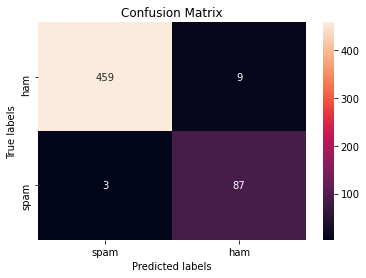

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt     


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['spam', 'ham']); ax.yaxis.set_ticklabels(['ham', 'spam']);

precision = cm[0,0]/(cm[0,0] + cm[0,1])
recall = cm[0,0]/(cm[0,0] + cm[1,0])
F1 = (2*recall*precision)/(recall+precision)                 
                  
print("the precision is:" ,precision)
print("the recall is:   " ,recall)
print("the F1 Score is:   " ,F1)


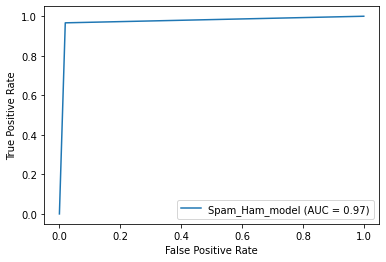

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
actual = y_test.tolist()
predicted = y_test_pred
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = roc_curve(actual, predicted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Spam_Ham_model')
display.plot()

plt.show()

## As we can see, the AUC is 0.97

In [45]:
print(roc_auc_score(actual, predicted))

0.9737179487179487


#### on first sight it looks like the naïve-bayes performs very well, but we should remember that even a very dumb model will perform well in ~86% percent of the cases because the data is so skewed.. In conclusion We can see that we have high F1 score which in our view the main indicator for the success of the model in case of such skewed data. So, considering the F1 score we got, we think that the model does performs well even after knowing that the data is highly skewed
